In [1]:
from keras.models import load_model
from generator import captcha_generator as gen
import string
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
import cv2

Using TensorFlow backend.


In [2]:
chars = string.ascii_lowercase + string.ascii_uppercase
width, height, n_len, n_class = 130, 53, 4, len(chars)

In [3]:
model = load_model('weixin_trained_model.h5')

/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/models.py:248: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
def decode(y):
    y = np.argmax(np.array(y), axis=2)[:,0]
    return ''.join([chars[x] for x in y])

In [5]:
def evaluate(model, batch_num=20):
    batch_acc = 0
    generator = gen(width=width, height=height)
    for i in tqdm(range(batch_num)):
        X, y = generator.next()
        y_pred = model.predict(X)
        batch_acc += np.mean(map(np.array_equal, np.argmax(y, axis=2).T, np.argmax(y_pred, axis=2).T))
    return batch_acc / batch_num

In [6]:
print evaluate(model)

100%|██████████| 20/20 [00:28<00:00,  1.33s/it]

0.0796875


In [7]:
generator = gen(width=width, height=height, batch_size=1)

In [8]:
X, y = generator.next()

In [9]:
X.shape
decode(y)

'yFwM'

In [10]:
def yevaluate(model, cnt=1000):
    batch_acc = 0
    generator = gen(width=width, height=height, batch_size=1)
    for _ in tqdm(range(cnt)):
        X, y = generator.next()
        y_pred = model.predict(X)
        if decode(y).lower() == decode(y_pred).lower():
            batch_acc += 1
    return float(batch_acc) / cnt

In [11]:
print yevaluate(model, 10000)

100%|██████████| 10000/10000 [04:16<00:00, 39.02it/s]

0.9398


# 生成函数测试

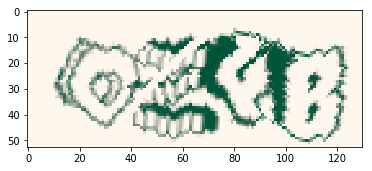

y: OzYB
pred_y: OZYB


In [12]:
a = gen(width=width, height=height, batch_size=1)
X, y = a.next()
pred_y = model.predict(X)
plt.imshow(cv2.cvtColor(X[0], cv2.COLOR_BGR2RGB))
plt.show()
print 'y:', decode(y)
print 'pred_y:', decode(pred_y)

In [13]:
X[:, 12:18, 3:10]

array([[[[237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254]],

        [[237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254]],

        [[237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254]],

        [[237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254]],

        [[237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254]],

        [[237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
  

# 实测

In [14]:
test_path = os.getcwd() + '/sample'
root, dirs, files = os.walk(test_path).next()

def getAllImages(path):
    cnt = len(files)
    X = np.zeros((cnt, height, width, 3), dtype=np.uint8)
    y = []
    for i, j in enumerate(files):
        X[i] = cv2.imread(root+'/'+j)
        #img = cv2.imread(root+'/'+j)
        #b, g, r = cv2.split(img)
        #X[i] = cv2.merge([r, g, b])
        y.append(j[:4])
    return X, y

allX, ally = getAllImages(test_path)

In [15]:
pred_y = model.predict(allX[2].reshape(X.shape))

In [16]:
decode(pred_y)

'NwHy'

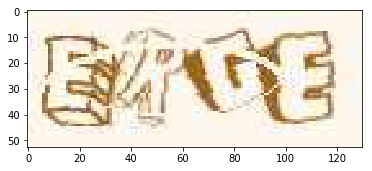

In [17]:
plt.imshow(cv2.cvtColor(allX[6], cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
allX[6][32:48, 6:8]

array([[[ 83, 120, 142],
        [ 94, 132, 156]],

       [[ 77, 114, 136],
        [ 81, 119, 143]],

       [[ 74, 110, 134],
        [ 76, 113, 139]],

       [[ 79, 115, 139],
        [ 92, 129, 157]],

       [[ 91, 125, 149],
        [115, 152, 180]],

       [[ 95, 129, 153],
        [120, 157, 185]],

       [[ 93, 124, 149],
        [104, 138, 167]],

       [[ 90, 118, 142],
        [ 84, 117, 143]],

       [[194, 221, 242],
        [158, 188, 213]],

       [[220, 244, 255],
        [197, 224, 245]],

       [[232, 252, 255],
        [227, 249, 255]],

       [[230, 246, 255],
        [231, 247, 255]],

       [[226, 238, 248],
        [229, 243, 255]],

       [[235, 244, 253],
        [240, 249, 255]],

       [[239, 247, 254],
        [248, 254, 255]],

       [[234, 243, 247],
        [243, 250, 253]]], dtype=uint8)

In [19]:
al = ally[0]
al.lower()

'febe'

In [20]:
count = len(ally)
correct = 0
for i, j in zip(allX, ally):
    predy = model.predict(i.reshape(X.shape))
    predy = decode(predy)
    if predy.lower() == j.lower():
        correct += 1
print 'the total correct number is %d' %correct
print 'the right rate is %.2f%%' %(float(correct)/count*100)

the total correct number is 270
the right rate is 27.66%


In [22]:
b, g, r = cv2.split(allX[6])

In [23]:
rgb_img = cv2.merge([r, g, b])

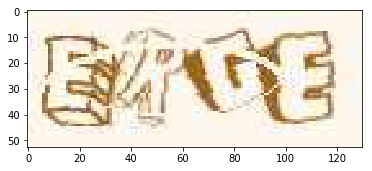

In [24]:
plt.imshow(rgb_img)
plt.show()